# Target representativeness
Understanding the representativeness of each class in your target variable is crucial for several reasons:

>With imbalanced classes, a model might become biased: predicting often towards the majority class, leading to poor performance on the minority class. This is especially important in classification problems. Such biases might manifest themselves in the metrics: accuracy can be misleading when classes are imbalanced. Knowing the class distribution helps choosing more appropriate metrics like precision, recall, F1-score, or AUC-ROC.Furthermore, Sampling Strategies also require these distributions: oversampling, undersampling, or using synthetic data generation methods (e.g., SMOTE) so there is margin to balance the classes.
<br><br>In many applications, the minority class might be of greater interest (e.g., fraud detection, medical diagnosis).

In [1]:
# One run setup

### UCI repo _____________________________________________________________________________________
from ucimlrepo import fetch_ucirepo                     # Fetch datasets from the UCIML Repository

# Data Science ___________________________________________________________________________________
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Utils __________________________________________________________________________________________
import sys, os
sys.path.insert(0, os.path.abspath(os.path.join('..', '..', 'utils')))
import preprocess as pp

### Fetching dataframes __________________________________________________________________________
german_credit = fetch_ucirepo(id=144)                   # All the data and metadata
df = fetch_ucirepo(id=144).data.original                # The actual data

# Dtype memory optimization
df = pp.preprocess_dtypes(df)

# Names
pp.set_column_names(df)

## The Target in each **categorical** class and across **numerical** attributes

> From the chart bellow we can check that both target values (True, False) are present in every single class.<br>
> Moreover, most of the numerical distributions on the False target seem to mimic it's counterpart; except for the Duration (mo) distributions, where the False target doesn't follow the True curve.

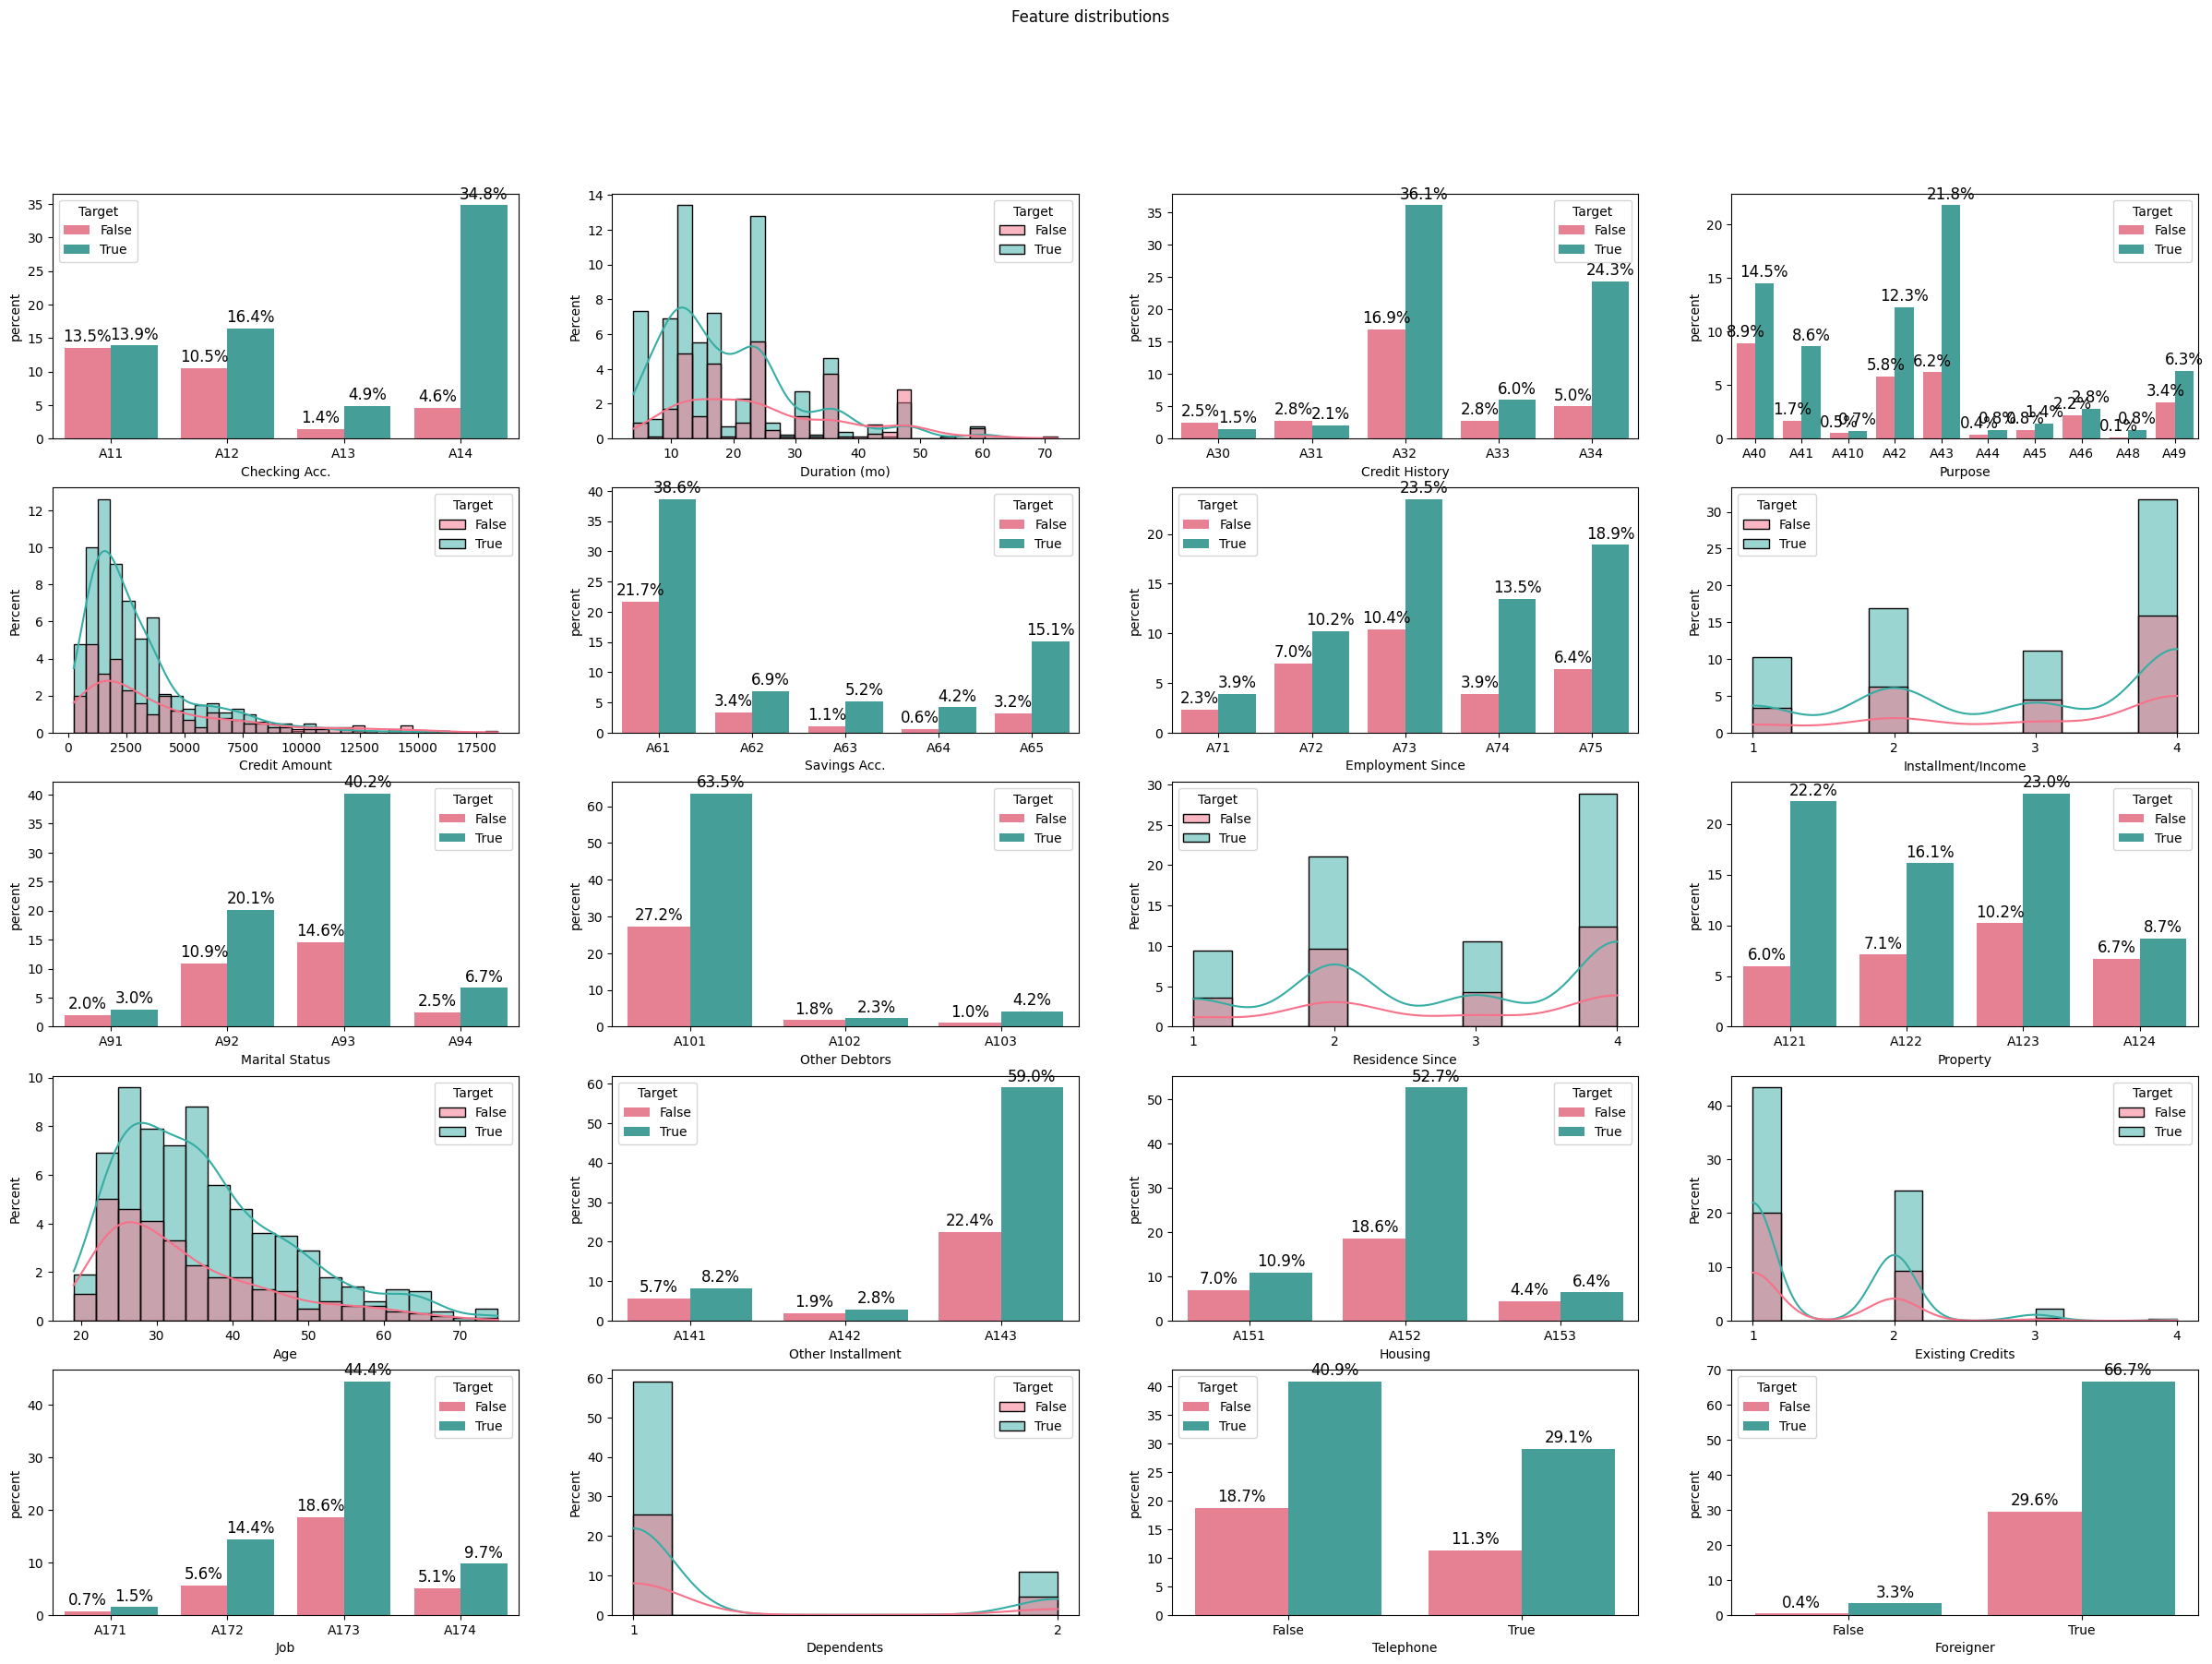

In [34]:
# Features distributions
fig, axes = plt.subplots(nrows=5, ncols=4, figsize=(30, 20))
axes = axes.flatten()
X = df.drop(columns='Target')

for i, feat in enumerate(X.columns):
    if X[feat].dtype == 'int64':
        sns.histplot(data=df, x=X[feat], kde=True, stat='percent', ax=axes[i], hue='Target', palette='husl')
        axes[i].xaxis.get_major_locator().set_params(integer=True)
    else:
        sns.countplot(x=feat, data=df, stat='percent', ax=axes[i], order=sorted(X[feat].unique()), hue='Target', palette='husl')
        
        # Annotate each bar with the count value
        for p in axes[i].patches:
            if p.get_height() > 0:  # Only annotate if height is greater than 0
                axes[i].annotate(f'{p.get_height():.1f}%', (p.get_x() + p.get_width() / 2., p.get_height()), 
                            ha='center', va='baseline', fontsize=12, color='black', xytext=(0, 5), 
                            textcoords='offset points')

plt.suptitle('Feature distributions')
plt.show()
# TODO: A410 after A41 ?!

## Correlation with the Target

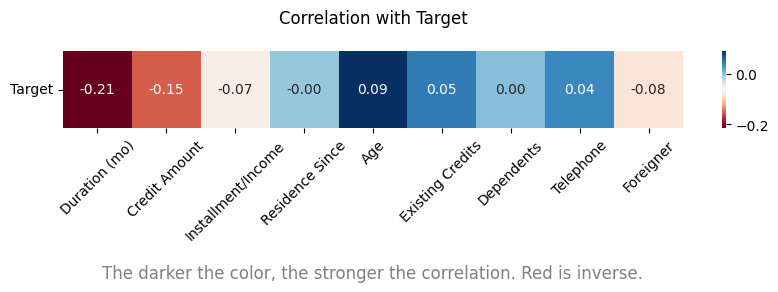

In [119]:
# Correlation with target 
plt.figure(figsize=(10, 1))

corr_target = df.select_dtypes(include=['int64', 'bool']).corr()[['Target']].drop(index='Target').transpose()

sns.heatmap(corr_target, annot=True, fmt='.2f', xticklabels=corr_target.columns, yticklabels=corr_target.index, cmap='RdBu')

plt.xticks(rotation=45)
plt.yticks(rotation=0)

plt.title('Correlation with Target', pad=20)
plt.text(.5, -2, 'The darker the color, the stronger the correlation. Red is inverse.', fontsize=12, ha='center', verticalalignment='bottom', transform=plt.gca().transAxes, color='grey')

plt.show()